#Importing Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Uploading Datasets

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Load Data**

In [102]:
dataset_concrete=pd.read_csv("/content/drive/MyDrive/PIAIC/Assigenments/compresive_strength_concrete.csv")

In [103]:
dataset_concrete.shape

(1030, 9)

In [104]:
dataset_concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**2.Check Missing Values** 

In [105]:
dataset_concrete.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [106]:
np.where(dataset_concrete.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [107]:
X_train = dataset_concrete.sample(frac = 0.7, random_state = 123)
X_test = dataset_concrete.drop(X_train.index)

In [108]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


#3.Assigning features and target variable

In [109]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [110]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [111]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [112]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [113]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


#Training and testing dataset_concrete splittion

**Model :**
 input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [114]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

In [115]:
network = M.Sequential()

In [116]:
network.add(L.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))

In [117]:
network.add(L.Dense(8,activation="relu"))

In [118]:
network.add(L.Dense(6,activation="relu"))

In [119]:
network.add(L.Dense(1))

In [120]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [121]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 1.0205 - mae: 0.7791 - val_loss: 0.9677 - val_mae: 0.7855
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8821 - mae: 0.7166 - val_loss: 0.8711 - val_mae: 0.7379
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8094 - mae: 0.6976 - val_loss: 0.7878 - val_mae: 0.6991
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6306 - mae: 0.5953 - val_loss: 0.7195 - val_mae: 0.6630
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7158 - mae: 0.6192 - val_loss: 0.6593 - val_mae: 0.6273
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6492 - mae: 0.5984 - val_loss: 0.6125 - val_mae: 0.6002
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5052 - mae: 0.5180 - val_loss: 0.5615 - val_mae: 0.5606
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4847 - m

In [122]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [123]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1620 - mae: 0.2903


In [124]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

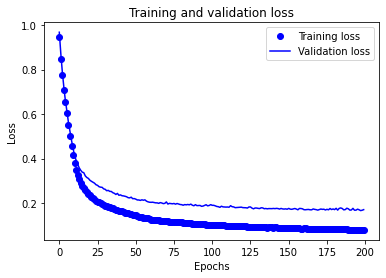

In [125]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

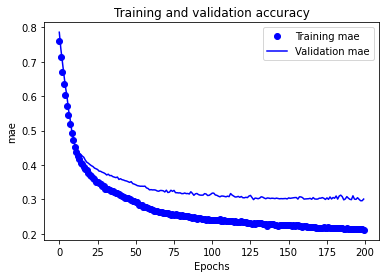

In [126]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [127]:
y_pred = network.predict(X_test)

In [128]:
def d_norm(x):
    return (x * Y_std) + Y_mean
    

In [129]:
y_pred = d_norm(y_pred)

In [130]:
y_true = d_norm(Y_test)

In [131]:
y_pred = y_pred.flatten()

In [132]:
y_pred.shape

(309,)

In [133]:
y_true.shape

(309,)

(0.0, 100.0)

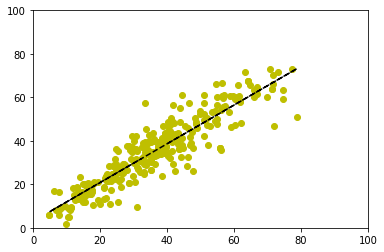

In [134]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)